In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input/movies-review'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/movies-review/1_movies_per_genre/Action.csv
/kaggle/input/movies-review/1_movies_per_genre/Crime.csv
/kaggle/input/movies-review/1_movies_per_genre/Adventure.csv
/kaggle/input/movies-review/1_movies_per_genre/Thriller.csv
/kaggle/input/movies-review/1_movies_per_genre/Drama.csv
/kaggle/input/movies-review/1_movies_per_genre/Sport.csv
/kaggle/input/movies-review/1_movies_per_genre/Mystery.csv
/kaggle/input/movies-review/1_movies_per_genre/History.csv
/kaggle/input/movies-review/1_movies_per_genre/Sci-Fi.csv
/kaggle/input/movies-review/1_movies_per_genre/Animation.csv
/kaggle/input/movies-review/1_movies_per_genre/Music.csv
/kaggle/input/movies-review/1_movies_per_genre/War.csv
/kaggle/input/movies-review/1_movies_per_genre/Biography.csv
/kaggle/input/movies-review/1_movies_per_genre/Horror.csv
/kaggle/input/movies-review/1_movies_per_genre/Comedy.csv
/kaggle/input/movies-review/1_movies_per_genre/Fantasy.csv
/kaggle/input/movies-review/1_movies_per_genre/Romance.csv


In [3]:
dataset = '/kaggle/input/movies-review/1_movies_per_genre/Horror.csv'
df = pd.read_csv(dataset)

In [4]:
df.head(5)

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Shining,1980,R,2h 26min,Drama; Horror;,13 June 1980 (USA),8.4,860290,1805,https://www.imdb.com/title/tt0081505/reviews/_...
1,Alien,1979,R,1h 57min,Horror; Sci-Fi;,22 June 1979 (USA),8.4,762793,1423,https://www.imdb.com/title/tt0078748/reviews/_...
2,World War Z,2013,PG-13,1h 56min,Action; Adventure; Horror;,21 June 2013 (USA),7.0,586801,1125,https://www.imdb.com/title/tt0816711/reviews/_...
3,Psycho,1960,R,1h 49min,Horror; Mystery; Thriller;,8 September 1960 (USA),8.5,580951,1263,https://www.imdb.com/title/tt0054215/reviews/_...
4,Shaun of the Dead,2004,R,1h 39min,Comedy; Horror;,24 September 2004 (USA),7.9,499244,971,https://www.imdb.com/title/tt0365748/reviews/_...


In [5]:
df.tail(5)

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
95,From Hell,2001,R,2h 2min,Horror; Mystery; Thriller;,19 October 2001 (USA),6.8,144083,553,https://www.imdb.com/title/tt0120681/reviews/_...
96,The Orphanage,2007,R,1h 45min,Drama; Fantasy; Horror;,11 January 2008 (USA),7.4,143875,339,https://www.imdb.com/title/tt0464141/reviews/_...
97,Train to Busan,2016,TV-MA,1h 58min,Action; Horror; Thriller;,21 October 2016 (India),7.5,143773,668,https://www.imdb.com/title/tt5700672/reviews/_...
98,Evil Dead II,1987,R,1h 24min,Comedy; Horror;,13 March 1987 (USA),7.8,143769,594,https://www.imdb.com/title/tt0092991/reviews/_...
99,Underworld Awakening,2012,R,1h 28min,Action; Fantasy; Horror;,20 January 2012 (USA),6.4,143381,297,https://www.imdb.com/title/tt1496025/reviews/_...


In [6]:
print('Number of Rows: ',df.shape[0])
print('Number of Columns: ',df.shape[1])

Number of Rows:  100
Number of Columns:  10


In [7]:
print('Columns are: \n',df.columns)

Columns are: 
 Index(['name', 'year', 'movie_rated', 'run_length', 'genres', 'release_date',
       'rating', 'num_raters', 'num_reviews', 'review_url'],
      dtype='object')


In [8]:
print('Data Types of columns : \n', df.dtypes)

Data Types of columns : 
 name             object
year              int64
movie_rated      object
run_length       object
genres           object
release_date     object
rating          float64
num_raters        int64
num_reviews       int64
review_url       object
dtype: object


In [9]:
print('Summery statistics for numerical columns', df.describe(exclude = [object]))

Summery statistics for numerical columns               year      rating    num_raters  num_reviews
count   100.000000  100.000000     100.00000   100.000000
mean   2003.490000    6.979000  248524.81000  1033.010000
std      12.977444    0.631224  124105.07878   680.616113
min    1960.000000    5.300000  143381.00000   294.000000
25%    1998.750000    6.575000  170106.75000   565.750000
50%    2006.500000    7.000000  209861.00000   832.500000
75%    2013.000000    7.425000  277390.50000  1221.500000
max    2019.000000    8.500000  860290.00000  3515.000000


In [10]:
print('Summery statistics for Categorical columns', df.describe(exclude = [np.number]))

Summery statistics for Categorical columns                name movie_rated run_length                       genres  \
count           100         100        100                          100   
unique          100           6         51                           25   
top     The Shining           R   1h 34min  Horror; Mystery; Thriller;    
freq              1          78          4                           14   

              release_date                                         review_url  
count                  100                                                100  
unique                 100                                                100  
top     13 June 1980 (USA)  https://www.imdb.com/title/tt0081505/reviews/_...  
freq                     1                                                  1  


# Explore unique genres in the dataset

In [11]:
unique_genres = df['genres'].unique()
print("Unique genres are : ", unique_genres)

Unique genres are :  ['Drama; Horror; ' 'Horror; Sci-Fi; ' 'Action; Adventure; Horror; '
 'Horror; Mystery; Thriller; ' 'Comedy; Horror; ' 'Horror; '
 'Horror; Thriller; ' 'Drama; Horror; Sci-Fi; ' 'Horror; Mystery; '
 'Horror; Mystery; Sci-Fi; ' 'Fantasy; Horror; Mystery; '
 'Action; Fantasy; Horror; ' 'Drama; Horror; Mystery; '
 'Action; Crime; Horror; ' 'Action; Horror; Sci-Fi; '
 'Adventure; Drama; Horror; ' 'Horror; Sci-Fi; Thriller; '
 'Comedy; Fantasy; Horror; ' 'Action; Horror; '
 'Comedy; Horror; Romance; ' 'Crime; Horror; Thriller; '
 'Adventure; Horror; Thriller; ' 'Drama; Fantasy; Horror; '
 'Action; Horror; Thriller; ' 'Fantasy; Horror; Thriller; ']


In [12]:
def convert_to_minutes(run_length):
    match = re.match(r'(?:(\d+)h)?\s*(\d+)?min', run_length)
    if match:
        hours = int(match.group(1) or 0)
        minutes = int(match.group(2) or 0)
        return hours * 60 + minutes
    else:
        return np.nan

In [13]:
df['run_length_minutes'] = df['run_length'].apply(convert_to_minutes)

# Correlation matrix

In [14]:
correlation_matrix = df[['run_length_minutes', 'rating', 'num_raters', 'num_reviews']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    run_length_minutes    rating  num_raters  num_reviews
run_length_minutes            1.000000  0.236022    0.223316     0.215395
rating                        0.236022  1.000000    0.526694     0.092932
num_raters                    0.223316  0.526694    1.000000     0.316114
num_reviews                   0.215395  0.092932    0.316114     1.000000


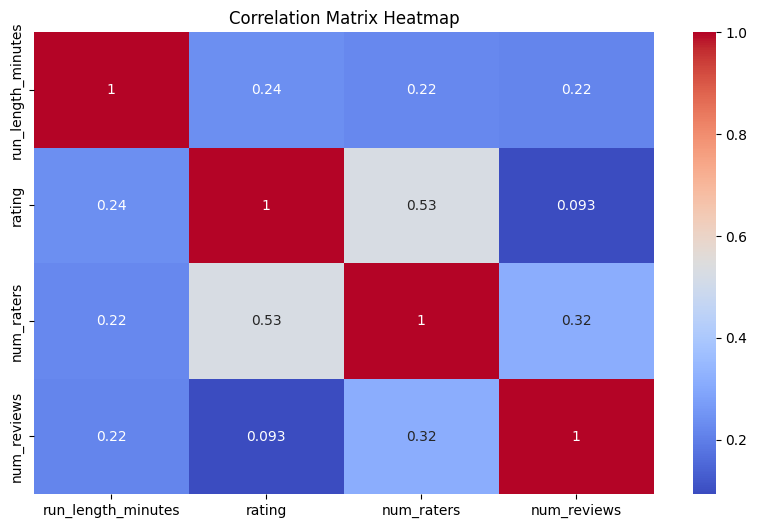

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

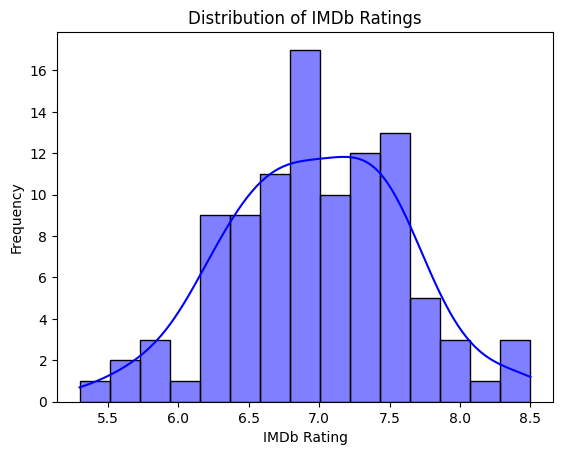

In [16]:
sns.histplot(df['rating'], kde = True, bins = 15, color = 'blue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')

# Top 10 Movies by IMDb Rating

In [17]:
top_10_movies = df.sort_values(by = 'rating', ascending = False).head(10)
top_10_movies

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,run_length_minutes
3,Psycho,1960,R,1h 49min,Horror; Mystery; Thriller;,8 September 1960 (USA),8.5,580951,1263,https://www.imdb.com/title/tt0054215/reviews/_...,109.0
0,The Shining,1980,R,2h 26min,Drama; Horror;,13 June 1980 (USA),8.4,860290,1805,https://www.imdb.com/title/tt0081505/reviews/_...,146.0
1,Alien,1979,R,1h 57min,Horror; Sci-Fi;,22 June 1979 (USA),8.4,762793,1423,https://www.imdb.com/title/tt0078748/reviews/_...,117.0
14,The Thing,1982,R,1h 49min,Horror; Mystery; Sci-Fi;,25 June 1982 (USA),8.1,356786,1095,https://www.imdb.com/title/tt0084787/reviews/_...,109.0
64,Rosemary's Baby,1968,R,2h 17min,Drama; Horror;,17 October 1968 (France),8.0,185587,557,https://www.imdb.com/title/tt0063522/reviews/_...,137.0
15,The Exorcist,1973,R,2h 2min,Horror;,26 December 1973 (USA),8.0,352076,1220,https://www.imdb.com/title/tt0070047/reviews/_...,122.0
4,Shaun of the Dead,2004,R,1h 39min,Comedy; Horror;,24 September 2004 (USA),7.9,499244,971,https://www.imdb.com/title/tt0365748/reviews/_...,99.0
98,Evil Dead II,1987,R,1h 24min,Comedy; Horror;,13 March 1987 (USA),7.8,143769,594,https://www.imdb.com/title/tt0092991/reviews/_...,84.0
43,Halloween,1978,R,1h 31min,Horror; Thriller;,27 October 1978 (USA),7.8,220718,1434,https://www.imdb.com/title/tt0077651/reviews/_...,91.0
5,Get Out,2017,R,1h 44min,Horror; Mystery; Thriller;,24 February 2017 (USA),7.7,465577,1566,https://www.imdb.com/title/tt5052448/reviews/_...,104.0


# Top 10 Movies by Number of IMDb Raters

In [18]:
top_10_movies = df.sort_values(by = 'num_raters', ascending = False).head(10)
top_10_movies

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,run_length_minutes
0,The Shining,1980,R,2h 26min,Drama; Horror;,13 June 1980 (USA),8.4,860290,1805,https://www.imdb.com/title/tt0081505/reviews/_...,146.0
1,Alien,1979,R,1h 57min,Horror; Sci-Fi;,22 June 1979 (USA),8.4,762793,1423,https://www.imdb.com/title/tt0078748/reviews/_...,117.0
2,World War Z,2013,PG-13,1h 56min,Action; Adventure; Horror;,21 June 2013 (USA),7.0,586801,1125,https://www.imdb.com/title/tt0816711/reviews/_...,116.0
3,Psycho,1960,R,1h 49min,Horror; Mystery; Thriller;,8 September 1960 (USA),8.5,580951,1263,https://www.imdb.com/title/tt0054215/reviews/_...,109.0
4,Shaun of the Dead,2004,R,1h 39min,Comedy; Horror;,24 September 2004 (USA),7.9,499244,971,https://www.imdb.com/title/tt0365748/reviews/_...,99.0
5,Get Out,2017,R,1h 44min,Horror; Mystery; Thriller;,24 February 2017 (USA),7.7,465577,1566,https://www.imdb.com/title/tt5052448/reviews/_...,104.0
6,It,2017,R,2h 15min,Horror;,8 September 2017 (USA),7.3,437678,1914,https://www.imdb.com/title/tt1396484/reviews/_...,135.0
7,The Conjuring,2013,R,1h 52min,Horror; Mystery; Thriller;,19 July 2013 (USA),7.5,427067,1054,https://www.imdb.com/title/tt1457767/reviews/_...,112.0
8,Split,2016,PG-13,1h 57min,Horror; Thriller;,20 January 2017 (USA),7.3,404539,986,https://www.imdb.com/title/tt4972582/reviews/_...,117.0
9,A Quiet Place,2018,PG-13,1h 30min,Drama; Horror; Sci-Fi;,6 April 2018 (USA),7.5,385782,2882,https://www.imdb.com/title/tt6644200/reviews/_...,90.0


# Top 10 Movies by Number of Reviews

In [19]:
top_10_movies = df.sort_values(by = 'num_reviews', ascending = False).head(10)
top_10_movies

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,run_length_minutes
39,The Blair Witch Project,1999,R,1h 21min,Horror; Mystery;,30 July 1999 (USA),6.5,226133,3515,https://www.imdb.com/title/tt0185937/reviews/_...,81.0
47,Hereditary,2018,R,2h 7min,Drama; Horror; Mystery;,8 June 2018 (USA),7.3,214947,3086,https://www.imdb.com/title/tt7784604/reviews/_...,127.0
51,Us,2019,R,1h 56min,Horror; Mystery; Thriller;,22 March 2019 (USA),6.9,204733,3049,https://www.imdb.com/title/tt6857112/reviews/_...,116.0
9,A Quiet Place,2018,PG-13,1h 30min,Drama; Horror; Sci-Fi;,6 April 2018 (USA),7.5,385782,2882,https://www.imdb.com/title/tt6644200/reviews/_...,90.0
30,Bird Box,2018,R,2h 4min,Drama; Horror; Sci-Fi;,21 December 2018 (USA),6.6,262311,2765,https://www.imdb.com/title/tt2737304/reviews/_...,124.0
79,Midsommar,2019,R,2h 28min,Drama; Horror; Mystery;,3 July 2019 (USA),7.1,165346,2580,https://www.imdb.com/title/tt8772262/reviews/_...,148.0
12,Cloverfield,2008,PG-13,1h 25min,Action; Adventure; Horror;,18 January 2008 (USA),7.0,365910,2336,https://www.imdb.com/title/tt1060277/reviews/_...,85.0
66,It Chapter Two,2019,R,2h 49min,Drama; Fantasy; Horror;,6 September 2019 (USA),6.6,183539,2182,https://www.imdb.com/title/tt7349950/reviews/_...,169.0
68,Mother!,2017,R,2h 1min,Drama; Horror; Mystery;,15 September 2017 (USA),6.6,182167,2074,https://www.imdb.com/title/tt5109784/reviews/_...,121.0
33,Alien: Covenant,2017,R,2h 2min,Horror; Sci-Fi; Thriller;,19 May 2017 (USA),6.4,245959,2058,https://www.imdb.com/title/tt2316204/reviews/_...,122.0


In [20]:
df.columns

Index(['name', 'year', 'movie_rated', 'run_length', 'genres', 'release_date',
       'rating', 'num_raters', 'num_reviews', 'review_url',
       'run_length_minutes'],
      dtype='object')

## Is there a relationship between the movie rating (movie_rated) and the IMDb rating?

In [25]:
df.groupby('movie_rated')['rating'].mean().reset_index()

,movie_rated,rating
0,NC-17,7.500000
1,Not Rated,6.800000
2,PG,7.300000
3,PG-13,6.844444
4,R,6.994872
5,TV-MA,7.500000


## How does the number of reviews impact the IMDb rating of movies?

/tmp/ipykernel_33/1955375095.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_group = df.groupby('review_bins')['rating'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


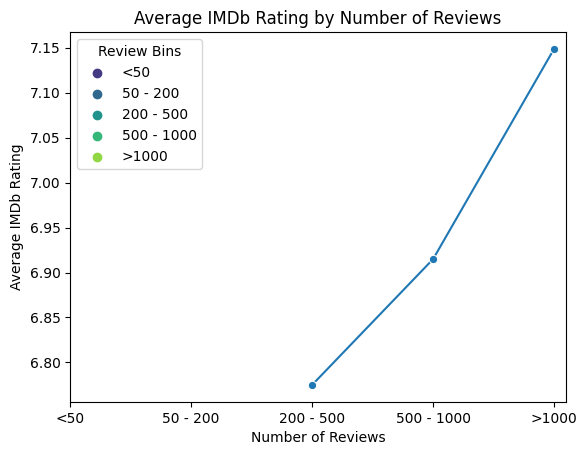

In [42]:
bins = [0, 50, 200, 500, 1000, df['num_reviews'].max()]
labels = ['<50', '50 - 200', '200 - 500', '500 - 1000', '>1000']
df['review_bins'] =  pd.cut(df['num_reviews'], bins = bins, labels = labels)

review_group = df.groupby('review_bins')['rating'].mean().reset_index()

sns.scatterplot(data=df, x='num_reviews', y='rating', hue='review_bins', palette='viridis', s=100)
sns.lineplot(data=review_group, x='review_bins', y='rating', marker='o', sort=False)

plt.title("Average IMDb Rating by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Average IMDb Rating")
plt.xticks(range(len(labels)), labels)
plt.legend(title='Review Bins')
plt.show()

## Identify the top 3 categories

In [69]:
bins = [0, 60, 90, 120, 150, np.inf]
labels = ['<1h', '1h-1.5h', '1.5h-2h', '2h-2.5h', '>2.5h']
df['run_length_category'] = pd.cut(df['run_length_minutes'], bins=bins, labels=labels)

category_counts = df['run_length_category'].value_counts().reset_index()
category_counts.columns = ['run_length_category', 'count']

top_3_categories = category_counts.nlargest(3, 'count')
print("Top 3 Movie Length Categories:")
print(top_3_categories)

Top 3 Movie Length Categories:
  run_length_category  count
0             1.5h-2h     62
1             2h-2.5h     18
2             1h-1.5h     16
